In [1]:
import numpy as np
from PIL import Image as im
import scipy.sparse
import matplotlib.pyplot as plt
from skimage import exposure
from scipy import ndimage as ndi
from skimage import feature, measure, segmentation, color, exposure, filters, morphology, restoration, img_as_ubyte
from skimage.util import map_array

import pandas as pd

In [2]:
N = 'C01339A4'

data = np.load('../../input/01_stereoseq_preprocessing/segmentation/layers/' + N + '_unspliced.npz', allow_pickle=True)
lst = data.files

# for item in lst:
#     print(item)
#     print(data[item])

m = scipy.sparse.csr_matrix((data['data'], data['indices'], data['indptr']), shape = data['shape']).A
s = 7000
size = 750
m = m[s:s+size, s:s+size]
m = m / m.max()
m = m > 0.05
m = m.astype('int')
m = m * 255
m = ndi.gaussian_filter(m, sigma=2)
m = m / m.max()
# p2, p98 = np.percentile(m, (0, 99))
# m = exposure.rescale_intensity(m, in_range=(p2, p98))
m = exposure.rescale_intensity(m)
m = ndi.white_tophat(m, footprint = morphology.disk(50))
m = exposure.rescale_intensity(m)
# p2, p98 = np.percentile(m, (2, 98))
# m = exposure.rescale_intensity(m, in_range=(p2, p98))

m = m * 255

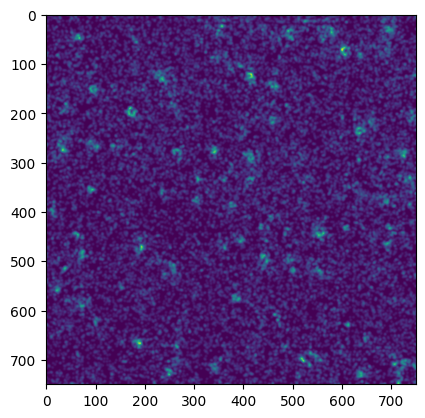

In [3]:
plt.imshow(m)

In [149]:
data = im.fromarray((m).astype('uint8'))
data.save('../../input/01_stereoseq_preprocessing/segmentation/unspliced_images/example_unspliced_mask.png')

In [167]:
m = np.load('../../input/01_stereoseq_preprocessing/segmentation/masks/' + N + '_mask.npy')
m

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [168]:
m = m[s:s+size, s:s+size]

In [169]:
data = im.fromarray((m * 255).astype('uint8'))
data.save('../../input/01_stereoseq_preprocessing/segmentation/unspliced_images/example_unspliced_objects.png')

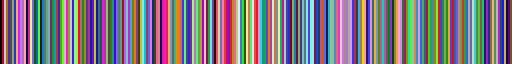

In [166]:
new_map

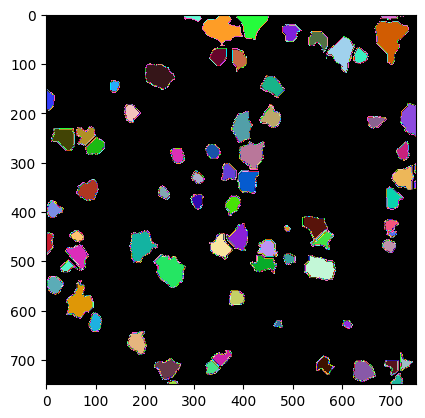

In [172]:
import random
import matplotlib

colors = [(0,0,0)] + [(random.random(),random.random(),random.random()) for i in range(255)]

new_map = matplotlib.colors.LinearSegmentedColormap.from_list('new_map', 
colors, N=256)
blobs, number_of_blobs = ndi.label(m)
plt.imshow(blobs, cmap=new_map)
# plt.show()

plt.savefig('../../input/01_stereoseq_preprocessing/segmentation/unspliced_images/example_unspliced_objects_colored.png')

In [165]:
data = im.fromarray((blobs).astype('uint8'))
data.save('../../input/01_stereoseq_preprocessing/segmentation/unspliced_images/example_unspliced_objects.png')

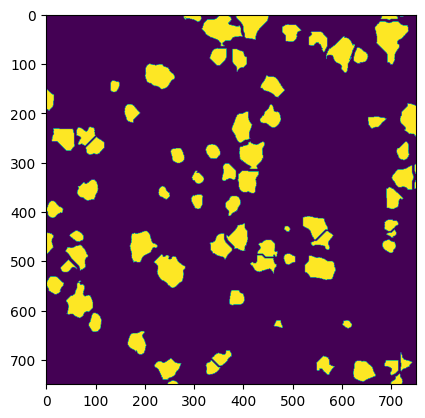

In [159]:
plt.imshow(m)

# Supplementary Figure 1

In [4]:
N = 'C01339A4'

unspliced = np.load('../../input/01_stereoseq_preprocessing/segmentation/layers/' + N + '_unspliced.npz', allow_pickle=True)
spliced = np.load('../../input/01_stereoseq_preprocessing/segmentation/layers/' + N + '_spliced.npz', allow_pickle=True)
X = np.load('../../input/01_stereoseq_preprocessing/segmentation/layers/' + N + '_X.npz', allow_pickle=True)

# lst = data.files

# for item in lst:
#     print(item)
#     print(data[item])

unspliced = scipy.sparse.csr_matrix((unspliced['data'], unspliced['indices'], unspliced['indptr']), shape = unspliced['shape']).A
spliced = scipy.sparse.csr_matrix((spliced['data'], spliced['indices'], spliced['indptr']), shape = spliced['shape']).A
X = scipy.sparse.csr_matrix((X['data'], X['indices'], X['indptr']), shape = X['shape']).A

s = 7000
size = 750
unspliced = unspliced[s:s+size, s:s+size]
spliced = spliced[s:s+size, s:s+size]
X = X[s:s+size, s:s+size]

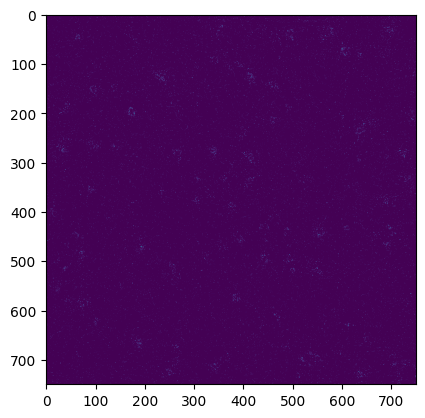

In [5]:
unspliced = exposure.rescale_intensity(unspliced)
plt.imshow(unspliced)

In [6]:
data = unspliced / unspliced.max()
data = im.fromarray((data * 255).astype('uint8'))
data.save('../../input/01_stereoseq_preprocessing/segmentation/supplementary/1_unspliced_start.png')

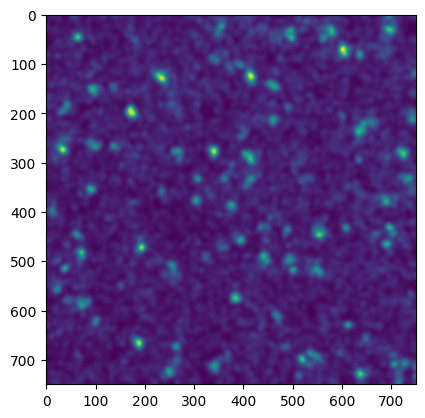

In [7]:
unspliced = ndi.gaussian_filter(unspliced, sigma=5)
plt.imshow(unspliced)

In [8]:
data = unspliced / unspliced.max()
data = im.fromarray((data * 255).astype('uint8'))
data.save('../../input/01_stereoseq_preprocessing/segmentation/supplementary/2_unspliced_gaussian.png')

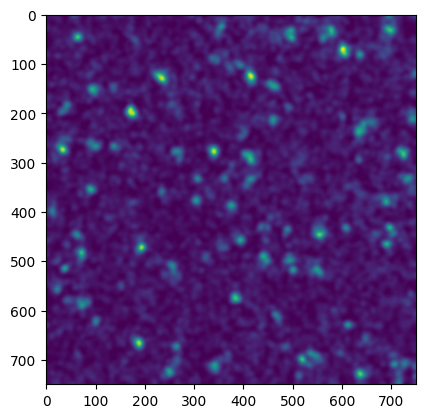

In [9]:
unspliced = ndi.white_tophat(unspliced, footprint = morphology.disk(50))
plt.imshow(unspliced)

In [10]:
data = unspliced / unspliced.max()
data = im.fromarray((data * 255).astype('uint8'))
data.save('../../input/01_stereoseq_preprocessing/segmentation/supplementary/3_unspliced_white_tophat.png')

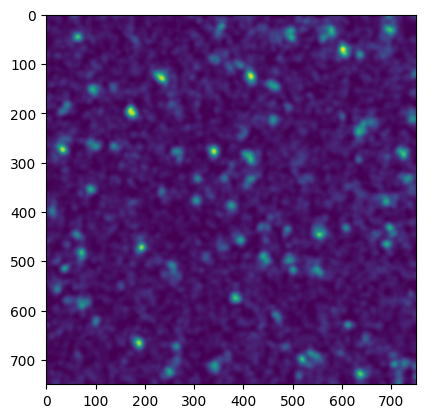

In [11]:
unspliced = exposure.rescale_intensity(unspliced)
plt.imshow(unspliced)

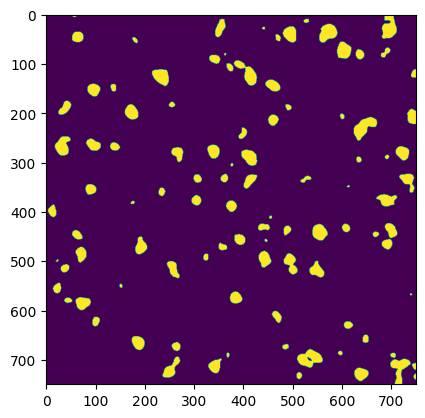

In [12]:
thresh = filters.threshold_otsu(unspliced)
binary_unspliced = unspliced >= thresh
plt.imshow(binary_unspliced)

In [13]:
# data = unspliced / unspliced.max()
data = im.fromarray((binary_unspliced * 255).astype('uint8'))
data.save('../../input/01_stereoseq_preprocessing/segmentation/supplementary/4_unspliced_otsu.png')

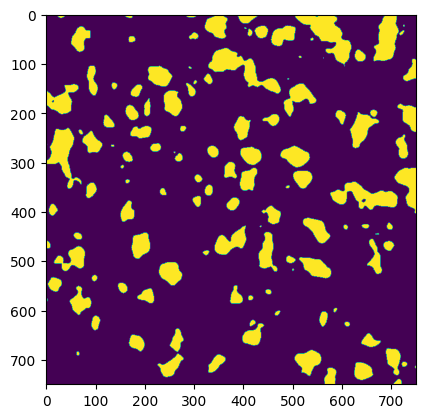

In [14]:
X = exposure.rescale_intensity(X)
X = ndi.gaussian_filter(X, sigma=5)
X = ndi.white_tophat(X, footprint = morphology.disk(50))
X = exposure.rescale_intensity(X)

thresh = filters.threshold_otsu(X)
binary_X = X >= thresh
plt.imshow(binary_X)

In [15]:
data = binary_X / binary_X.max()
data = im.fromarray((binary_X * 255).astype('uint8'))
data.save('../../input/01_stereoseq_preprocessing/segmentation/supplementary/5_X_otsu.png')

label...
watershed...
dilation...


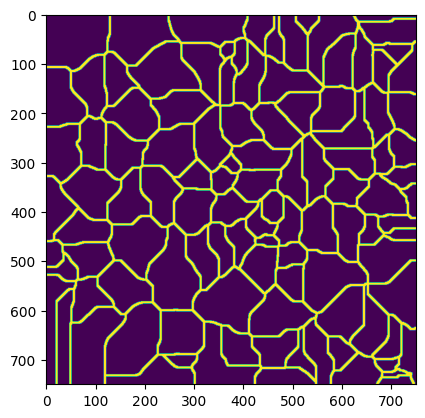

In [16]:
distance = ndi.distance_transform_edt(binary_unspliced)
local_max_coords = feature.peak_local_max(distance, 
          min_distance=7, 
          labels = binary_unspliced)
local_max_mask = np.zeros(distance.shape, dtype=bool)
local_max_mask[tuple(local_max_coords.T)] = True
print('label...')
markers = measure.label(local_max_mask)
print('watershed...')
segmented_cells = segmentation.watershed(-distance, markers, watershed_line=True)
print('dilation...')
watershed_lines = morphology.binary_dilation(segmented_cells == 0, footprint=np.ones((5,5)))
plt.imshow(watershed_lines)

In [17]:
# data = binary_X / binary_X.max()
data = im.fromarray((watershed_lines * 255).astype('uint8'))
data.save('../../input/01_stereoseq_preprocessing/segmentation/supplementary/6_unspliced_watershed_lines.png')

erosion...


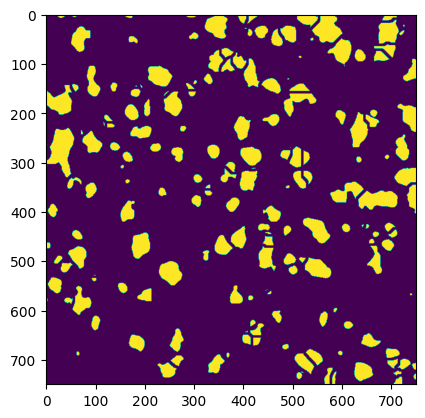

In [18]:
# generate post-watershed mask and fill holes
mask = (binary_X + binary_unspliced).astype('int')
mask[watershed_lines] = 0
seed = np.copy(mask)
seed[1:-1, 1:-1] = mask.max()
print('erosion...')
mask = morphology.reconstruction(seed, mask, method = 'erosion') # fill holes

plt.imshow(mask)

In [19]:
# data = binary_X / binary_X.max()
data = im.fromarray((mask * 255).astype('uint8'))
data.save('../../input/01_stereoseq_preprocessing/segmentation/supplementary/7_unspliced_mask_post_watershed.png')

measure...
map array...


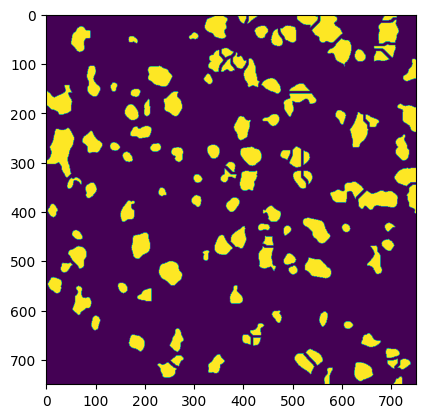

In [20]:
 # filter on area
print('measure...')
label = measure.label(mask)
label_overlay = color.label2rgb(label, image=mask, bg_label=0)
df = pd.DataFrame(measure.regionprops_table(label, X, properties=['label', 'area', 'intensity_mean', 'equivalent_diameter_area', 'eccentricity', 'centroid']))
keep = df['label'] * (df['equivalent_diameter_area'] > 15)
print('map array...')
label_filtered = map_array(label, np.asarray(df['label']), np.asarray(keep))
label_filtered[label_filtered > 0] = 1
mask = label_filtered

plt.imshow(mask)

In [21]:
# data = binary_X / binary_X.max()
data = im.fromarray((mask * 255).astype('uint8'))
data.save('../../input/01_stereoseq_preprocessing/segmentation/supplementary/8_unspliced_mask_filter_area.png')

distance...
watershed...
dilation...


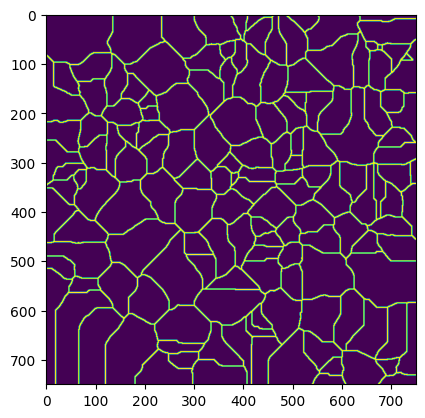

In [22]:
# watershed on X
print('distance...')
distance = ndi.distance_transform_edt(mask)
local_max_coords = feature.peak_local_max(distance, 
                                          min_distance=7, 
                                          labels = mask)
local_max_mask = np.zeros(distance.shape, dtype=bool)
local_max_mask[tuple(local_max_coords.T)] = True
markers = measure.label(local_max_mask)
print('watershed...')
segmented_cells = segmentation.watershed(-distance, markers, watershed_line=True)
print('dilation...')
watershed_lines = morphology.binary_dilation(segmented_cells == 0, footprint=np.ones((3,3)))

plt.imshow(watershed_lines)

In [23]:
# data = binary_X / binary_X.max()
data = im.fromarray((watershed_lines * 255).astype('uint8'))
data.save('../../input/01_stereoseq_preprocessing/segmentation/supplementary/9_X_watershed_lines.png')

measure...
map array...


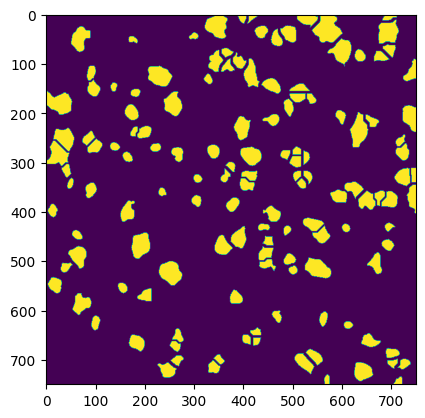

In [24]:
# remove X-watershed lines from mask
mask[watershed_lines] = 0

# filter on area
print('measure...')
label = measure.label(mask)
label_overlay = color.label2rgb(label, image=mask, bg_label=0)
df = pd.DataFrame(measure.regionprops_table(label, properties=['label', 'equivalent_diameter_area']))
keep = df['label'] * (df['equivalent_diameter_area'] > 15)
print('map array...')
label_filtered = map_array(label, np.asarray(df['label']), np.asarray(keep))
label_filtered[label_filtered > 0] = 1
mask = label_filtered

plt.imshow(mask)

In [25]:
# data = binary_X / binary_X.max()
data = im.fromarray((mask * 255).astype('uint8'))
data.save('../../input/01_stereoseq_preprocessing/segmentation/supplementary/10_mask_remove_X_watershed_lines.png')

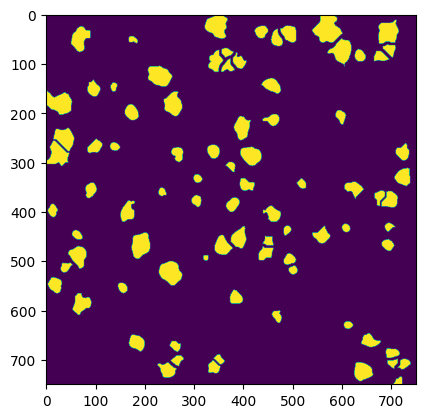

In [26]:
# filter on overlap with unspliced mask and eccentricity
df = pd.DataFrame(measure.regionprops_table(label, binary_unspliced, properties=['label', 'intensity_max', 'eccentricity']))
keep = df['label'] * ((df['intensity_max'] > 0) & (df['eccentricity'] < 0.8))
label_filtered = map_array(label, np.asarray(df['label']), np.asarray(keep))
label_filtered[label_filtered > 0] = 1
mask = label_filtered

plt.imshow(mask)

In [27]:
# data = binary_X / binary_X.max()
data = im.fromarray((mask * 255).astype('uint8'))
data.save('../../input/01_stereoseq_preprocessing/segmentation/supplementary/11_mask_filter_overlap_with_unspliced_mask_and_eccentricity.png')